In [2]:
#Original method: predicting weights directly


#import packages 
import pdb
import numpy as np
import itertools

from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import Callback
from keras.datasets import mnist
from keras import backend as K
from keras.initializers import VarianceScaling
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2

import pandas as pd 
import os 

#data 
os.getcwd()
path = 'C:\\Users\Wyj\desktop'
os.chdir(path)

high_p = pd.read_excel('data.xlsx',sheet_name='High')
low_p = pd.read_excel('data.xlsx',sheet_name='Low')
close_p = pd.read_excel('data.xlsx',sheet_name='Close')

#construct x and y 
N = 20000

def softmax(z):
    a = []
    for i in z:
        a.append(np.exp(i)/np.sum(np.exp(z)))
    return a


high = high_p.values
low = low_p.values
close = close_p.values

x = []
x_p = np.zeros((50,5,3))

y = []
y_p = np.zeros((5,1))


for i in range(N):
    # one price tensor  
    x_p[:,:,0] = high[i:(50+i),:]       
    x_p[:,:,1] = low[i:(50+i),:]
    x_p[:,:,2] = close[i:(50+i),:] 
    x.append(x_p) 
    #x1[i,:,0] = high[i:(50+i),1]       
    #x1[i,:,1] = low[i:(50+i),1]
    #x1[i,:,2] = close[i:(50+i),1] 
    # one output vector 
    # scaling 
    test = close[(50+i),:]-close[(49+i),:]
    y_p = softmax(test) 
    y.append(y_p)
    #y1[i,1] = close[(50+i),1]-close[(49+i),1]
    

In [27]:
#model construction 

w = np.zeros((int(N*0.25),5))
p = np.zeros((int(N*0.25),5))
scores = np.zeros((5,3))
for j in range(5):
    x1 = np.zeros((N,50,3))
    y1 = np.zeros((N,1))

    for i in range(N):
        x1[i,:,:] = x[i][:,j,:]
        y1[i,0] = y[i][j]

    tr1 = (x1[:int(N*0.75),:,1],y1[:int(N*0.75),:])
    te1 = (x1[int(N*0.75):,:,1],y1[int(N*0.75):,:])
    
    p[:,j] = close[int(N*0.75):N,j]/close[int(N*0.75-1):N-1,j]
    
    #NN
    model0 = Sequential()
    model0.add(Dense(units=12, input_dim=50, activation='relu'))
    model0.add(Dense(units=8, activation='relu'))
    model0.add(Dense(units=1, activation='linear'))
    model0.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model0.fit(tr1[0], tr1[1])
    #w[:,j] = model0.predict(te1[0])
    scores[j,0] = model0.evaluate(te1[0], te1[1])[0]
    pred = model0.predict(te1[0])
    w[:,j] = pred[:,0]
    #layers = [Dense(input_dim=(50*3), units=24, activation='relu'),
    #          Dense(units=12, activation='relu'),
    #          Dense(units=4, activation='relu'),
    #          Dense(units=1, activation="linear")]
    #run_keras_fc_mnist(tr1, te1, layers, epochs=1, split=0.1, trials=5)
total_score = np.sum(scores)    
print(total_score)

Epoch 1/1
5000/5000 [==============================] - 0s 77us/step
Epoch 1/1
5000/5000 [==============================] - 0s 78us/step
Epoch 1/1
5000/5000 [==============================] - 0s 82us/step
Epoch 1/1
5000/5000 [==============================] - 0s 89us/step
Epoch 1/1
5000/5000 [==============================] - 0s 95us/step
22.92515894947052


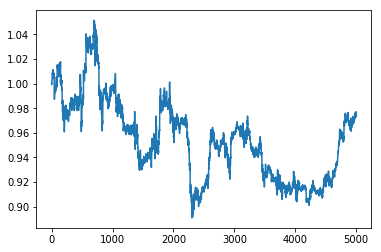

In [28]:
#return plot 
ret = np.ones((int(N*0.25),1))

#w[0,:] = w[0,:]/np.sum(w[0,:])
#print(w[0,:]*p[i+1,:])

for i in range(int(N*0.25)-1):
    w[i,:] = w[i,:]/np.sum(w[i,:])
    ret[i+1,0] = ret[i,0]*np.sum(w[i,:]*p[i+1,:])


plt2.plot(ret[:,0])

In [35]:
#CNN
w1 = np.zeros((int(N*0.25),5))

for j in range(5):
    x1 = np.zeros((N,50,3))
    y1 = np.zeros((N,1))

    for i in range(N):
        x1[i,:,:] = x[i][:,j,:]
        y1[i,0] = y[i][j]

    tr1 = (x1[:int(N*0.75),:,:],y1[:int(N*0.75),:])
    tr1 = (tr1[0].reshape((tr1[0].shape[0],tr1[0].shape[1],tr1[0].shape[2],1)),y1[:int(N*0.75),:])
    te1 = (x1[int(N*0.75):,:,:],y1[int(N*0.75):,:])
    te1 = (te1[0].reshape((te1[0].shape[0],te1[0].shape[1],te1[0].shape[2],1)),y1[int(N*0.75):,:])
    
    #RNN
    model1 = Sequential()
    model1.add(Conv2D(24, (3, 1), activation='relu', input_shape=(50, 3,1)))
    model1.add(MaxPooling2D(pool_size=(2, 1)))
    model1.add(Flatten())
    model1.add(Dense(12, activation='relu'))
    model1.add(Dropout(0.5))
    model1.add(Dense(units=4, activation="relu"))
    model1.add(Dense(units=1, activation="linear"))
    model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model1.fit(tr1[0], tr1[1])
    scores1 = model1.evaluate(te1[0], te1[1])[0]
    pred1 = model1.predict(te1[0])
    w1[:,j] = pred1[:,0]
    print(scores1)


Epoch 1/1
5000/5000 [==============================] - 1s 148us/step
0.5070271118164063
Epoch 1/1
5000/5000 [==============================] - 1s 148us/step
0.5153592548370362
Epoch 1/1
5000/5000 [==============================] - 1s 150us/step
3.2236240612030027
Epoch 1/1
5000/5000 [==============================] - 1s 152us/step
3.2236272060394286
Epoch 1/1
5000/5000 [==============================] - 1s 163us/step
0.5041830247879028


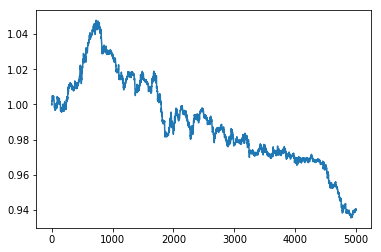

In [37]:
#return plot 2
ret1 = np.ones((int(N*0.25),1))

#w[0,:] = w[0,:]/np.sum(w[0,:])
#print(w[0,:]*p[i+1,:])

for i in range(int(N*0.25)-1):
    w1[i,:] = w1[i,:]/np.sum(w1[i,:])
    ret1[i+1,0] = ret1[i,0]*np.sum(w1[i,:]*p[i+1,:])


plt2.plot(ret1[:,0])


In [33]:
#unworked models 
#LSTM
model3 = Sequential()
model3.add(Embedding(max_features, output_dim=12))
model3.add(LSTM(12))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='linear'))
model3.compile(loss='binary_crossentropy',
optimizer='rmsprop',
metrics=['accuracy'])
model3.fit(tr1[0], tr1[1])
scores3 = model3.evaluate(te1[0], te1[1])

(5000, 1)
(15000, 50, 3, 1)
